In [15]:
# Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
# first 1M rows of the dataset (locally)
df = pd.read_csv("/Users/surajsharma/Desktop/AIPM_Bootcamp/Group-3-Expedia-Hotel-Recommendation/data/train.csv", nrows=1000000)
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [19]:
# Random 1M rows of the dataset
n_rows = sum(1 for line in open("/Users/surajsharma/Desktop/AIPM_Bootcamp/Group-3-Expedia-Hotel-Recommendation/data/train.csv")) - 1  # total rows (excluding header)
skip = sorted(np.random.choice(np.arange(1, n_rows+1), n_rows-1_000_000, replace=False))

df_sample = pd.read_csv("/Users/surajsharma/Desktop/AIPM_Bootcamp/Group-3-Expedia-Hotel-Recommendation/data/train.csv", skiprows=skip)

In [20]:
df_sample.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-07-16 10:02:58,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,10
1,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
2,2014-11-23 17:06:12,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,0,1,3,151,69,6
3,2014-01-08 13:58:04,2,3,66,462,41898,2454.8588,1482,0,1,...,0,2,12009,1,0,1,2,50,680,95
4,2014-01-08 14:15:40,2,3,66,462,41898,2455.2272,1482,0,0,...,0,1,28494,6,0,4,2,50,680,77


In [21]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_time                  1000000 non-null  object 
 1   site_name                  1000000 non-null  int64  
 2   posa_continent             1000000 non-null  int64  
 3   user_location_country      1000000 non-null  int64  
 4   user_location_region       1000000 non-null  int64  
 5   user_location_city         1000000 non-null  int64  
 6   orig_destination_distance  641506 non-null   float64
 7   user_id                    1000000 non-null  int64  
 8   is_mobile                  1000000 non-null  int64  
 9   is_package                 1000000 non-null  int64  
 10  channel                    1000000 non-null  int64  
 11  srch_ci                    998731 non-null   object 
 12  srch_co                    998731 non-null   object 
 13  srch_adults_c

In [32]:
# duplicates in user_id column
df_sample['user_id'].duplicated().sum()

511069

In [26]:
# missing values
df_sample.isnull().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    358494
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                        1269
srch_co                        1269
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [22]:
# Save sample file as CSV
df_sample.to_csv("/Users/surajsharma/Desktop/AIPM_Bootcamp/Group-3-Expedia-Hotel-Recommendation/data/train_sample_1M.csv", index=False)


In [27]:
# unique values in each column
df_sample.nunique()

date_time                    987840
site_name                        43
posa_continent                    5
user_location_country           227
user_location_region            923
user_location_city            26180
orig_destination_distance    552776
user_id                      488931
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1127
srch_co                        1127
srch_adults_cnt                  10
srch_children_cnt                10
srch_rm_cnt                       9
srch_destination_id           23239
srch_destination_type_id          8
is_booking                        2
cnt                              43
hotel_continent                   7
hotel_country                   199
hotel_market                   2091
hotel_cluster                   100
dtype: int64

In [28]:
# checking duplicate rows
df_sample.duplicated().sum()

1

In [30]:
# unique values of hotel_market column
df_sample['hotel_market'].unique()


array([ 675,  185,   69, ..., 1842, 1963, 1978])

In [31]:
df_sample['hotel_market'].describe()

count    1000000.000000
mean         600.139665
std          511.679356
min            0.000000
25%          159.000000
50%          592.000000
75%          701.000000
max         2117.000000
Name: hotel_market, dtype: float64

#### Formatting observations

- All date columns need to be formatted to datetype (date_time, srch_ci, srch_co)

## Working with a copy

In [33]:
df = df_sample.copy()

In [34]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-07-16 10:02:58,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,10
1,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
2,2014-11-23 17:06:12,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,0,1,3,151,69,6
3,2014-01-08 13:58:04,2,3,66,462,41898,2454.8588,1482,0,1,...,0,2,12009,1,0,1,2,50,680,95
4,2014-01-08 14:15:40,2,3,66,462,41898,2455.2272,1482,0,0,...,0,1,28494,6,0,4,2,50,680,77


In [35]:
# parse only the datetime columns
df['date_time'] = pd.to_datetime(df['date_time'])
df['srch_ci']   = pd.to_datetime(df['srch_ci'], errors='coerce')
df['srch_co']   = pd.to_datetime(df['srch_co'], errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   date_time                  1000000 non-null  datetime64[ns]
 1   site_name                  1000000 non-null  int64         
 2   posa_continent             1000000 non-null  int64         
 3   user_location_country      1000000 non-null  int64         
 4   user_location_region       1000000 non-null  int64         
 5   user_location_city         1000000 non-null  int64         
 6   orig_destination_distance  641506 non-null   float64       
 7   user_id                    1000000 non-null  int64         
 8   is_mobile                  1000000 non-null  int64         
 9   is_package                 1000000 non-null  int64         
 10  channel                    1000000 non-null  int64         
 11  srch_ci                    998731 non-

## Data cleaning and feature engineering

In [37]:
# add new column length_of_stay
df['length_of_stay'] = (df['srch_co'] - df['srch_ci']).dt.days

In [38]:
df['length_of_stay'].describe()

count    998731.000000
mean          3.364032
std           3.280389
min        -360.000000
25%           1.000000
50%           3.000000
75%           4.000000
max         516.000000
Name: length_of_stay, dtype: float64

In [39]:
df['length_of_stay'].unique()

array([   1.,    8.,    2.,    5.,    3.,    9.,    7.,    4.,    6.,
         13.,  -56.,   15.,   10.,   14.,   nan,   11.,   12.,    0.,
         17.,   32.,   30.,   20.,   16.,   21.,   22.,   23.,   25.,
         37.,   28.,   18.,   26.,   31.,   61.,   19.,   24.,   46.,
         27.,   43.,   29.,   35.,   59.,   34.,   56.,   36.,  120.,
         79.,   57.,   52.,   58.,   38.,   39.,   89.,   41.,   33.,
         42.,   91.,   48.,   60.,  153.,   44.,  181.,   78.,   92.,
        255.,  -55.,  -47.,   47.,  123.,   62.,  183.,  215., -142.,
         54.,   63., -261.,   40.,  122.,  516., -174.,   50., -263.,
       -109.,  -58., -234.,  368., -230.,  370., -115., -262., -286.,
         64.,   49.,   94.,  151., -312.,  -27., -322.,  -82.,   55.,
        155.,  261.,  214., -204., -293.,  -28.,   77.,   51.,   53.,
        198.,  245.,   80.,  186.,  -21.,   76.,   65., -200.,  192.,
         72.,  154.,  -29.,   93.,  337., -360.,  169.])

#### Why are there entries where length of stay is negative

In [40]:
# count of all values in length_of_stay column where length_of_stay < 0
df[df['length_of_stay'] < 0]['length_of_stay'].value_counts()

length_of_stay
-263.0    2
-234.0    2
-56.0     1
-312.0    1
-29.0     1
-200.0    1
-21.0     1
-28.0     1
-293.0    1
-204.0    1
-82.0     1
-322.0    1
-27.0     1
-262.0    1
-286.0    1
-55.0     1
-115.0    1
-230.0    1
-58.0     1
-109.0    1
-174.0    1
-261.0    1
-142.0    1
-47.0     1
-360.0    1
Name: count, dtype: int64

In [53]:
# dataframe only with rows with length_of_stay < 0
df_negative_los = df[df['length_of_stay'] < 0]
df_negative_los

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,length_of_stay
53,2014-12-03 08:08:52,11,3,205,354,41495,5999.8215,7899,0,0,...,1,15254,5,0,1,5,100,796,36,-56.0
129835,2014-08-27 12:31:44,11,3,205,339,36801,NaN,616387,0,1,...,1,8238,1,0,1,6,31,155,18,-55.0
150723,2014-09-26 16:11:55,13,1,46,336,13318,1904.5645,261972,0,1,...,1,6387,1,0,1,6,170,1894,44,-47.0
234452,2014-10-03 07:34:47,11,3,205,354,9189,NaN,817631,0,0,...,1,21588,6,0,3,6,144,24,25,-142.0
274938,2014-10-23 09:35:40,13,1,46,408,29175,NaN,247884,0,1,...,1,20278,6,0,3,6,105,809,23,-261.0
314966,2014-09-26 20:25:03,37,1,69,772,2058,NaN,1188156,1,0,...,2,8745,1,0,1,6,204,27,64,-174.0
326154,2014-09-24 19:03:31,37,1,69,573,33444,NaN,332428,0,1,...,1,2339,3,0,1,6,204,1777,29,-263.0
340397,2014-10-29 14:54:13,8,4,77,824,24848,NaN,977609,0,0,...,1,18569,1,0,2,3,182,83,62,-109.0
342758,2014-09-17 16:06:26,34,3,205,354,23208,209.5330,41310,0,1,...,1,11360,1,0,1,2,50,724,13,-58.0
356013,2014-11-20 22:16:11,11,3,205,155,19334,2611.2722,420441,0,0,...,1,8268,1,0,1,2,50,682,9,-234.0


In [ ]:
# unique values in 'is_booking' column of df_negative_los dataframe
df_negative_los['is_booking'].unique()

array([0])

### We decided to remove a few rows from df dataframe

In [56]:
# from df dataframe, remove rows where length_of_stay < 0
df = df[df['length_of_stay'] >= 0]
df.shape

(998704, 25)

In [59]:
# from df dataframe, remove rows where length_of_stay is null
df = df[df['length_of_stay'].notnull()]
df.shape

(998704, 25)

In [60]:
# from df dataframe, remove rows where length_of_stay > 365
df = df[df['length_of_stay'] <= 365]
df.shape

(998701, 25)

In [61]:
# from df dataframe, remove duplicate rows
df = df.drop_duplicates()
df.shape

(998700, 25)

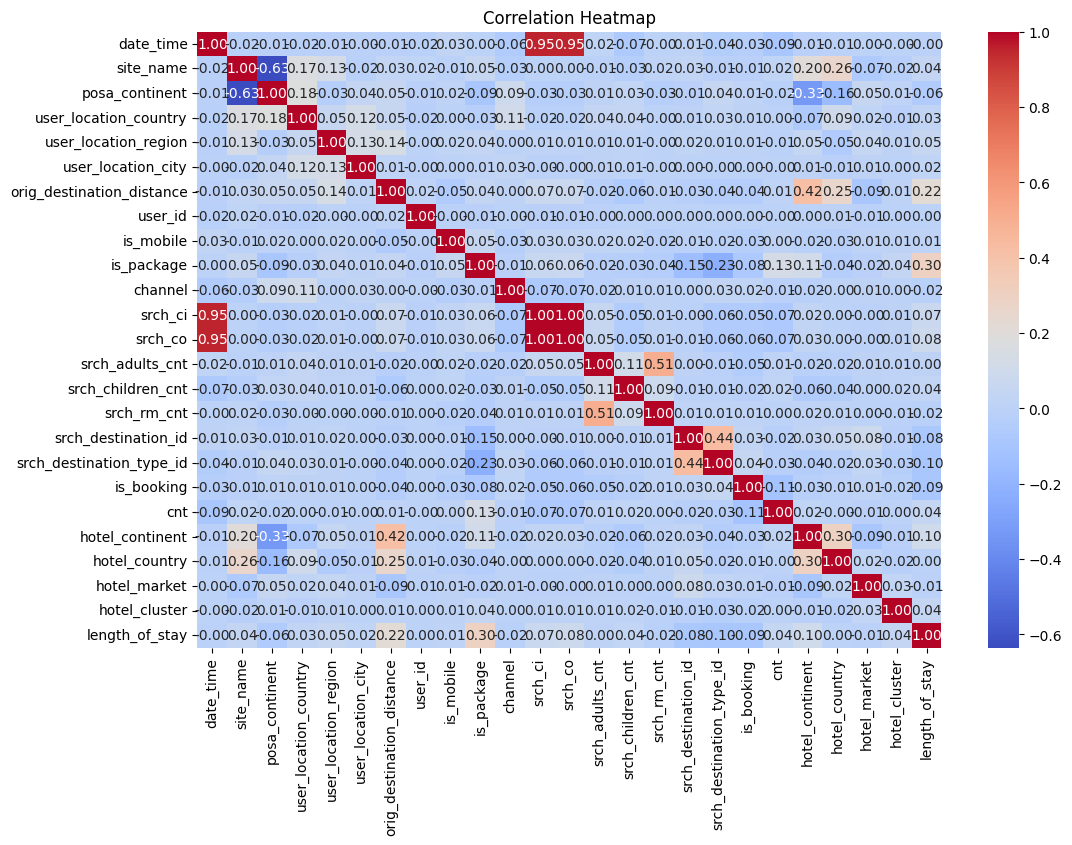

In [62]:
# plot correlation heatmap against hotel_cluster column
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
# How many clusters? Which are most common?
df['hotel_cluster'].nunique(), df['hotel_cluster'].value_counts().head(10)

(100,
 hotel_cluster
 91    27707
 41    20267
 48    19791
 64    18782
 65    17878
 5     16368
 98    15621
 59    15137
 18    14741
 21    14525
 Name: count, dtype: int64)

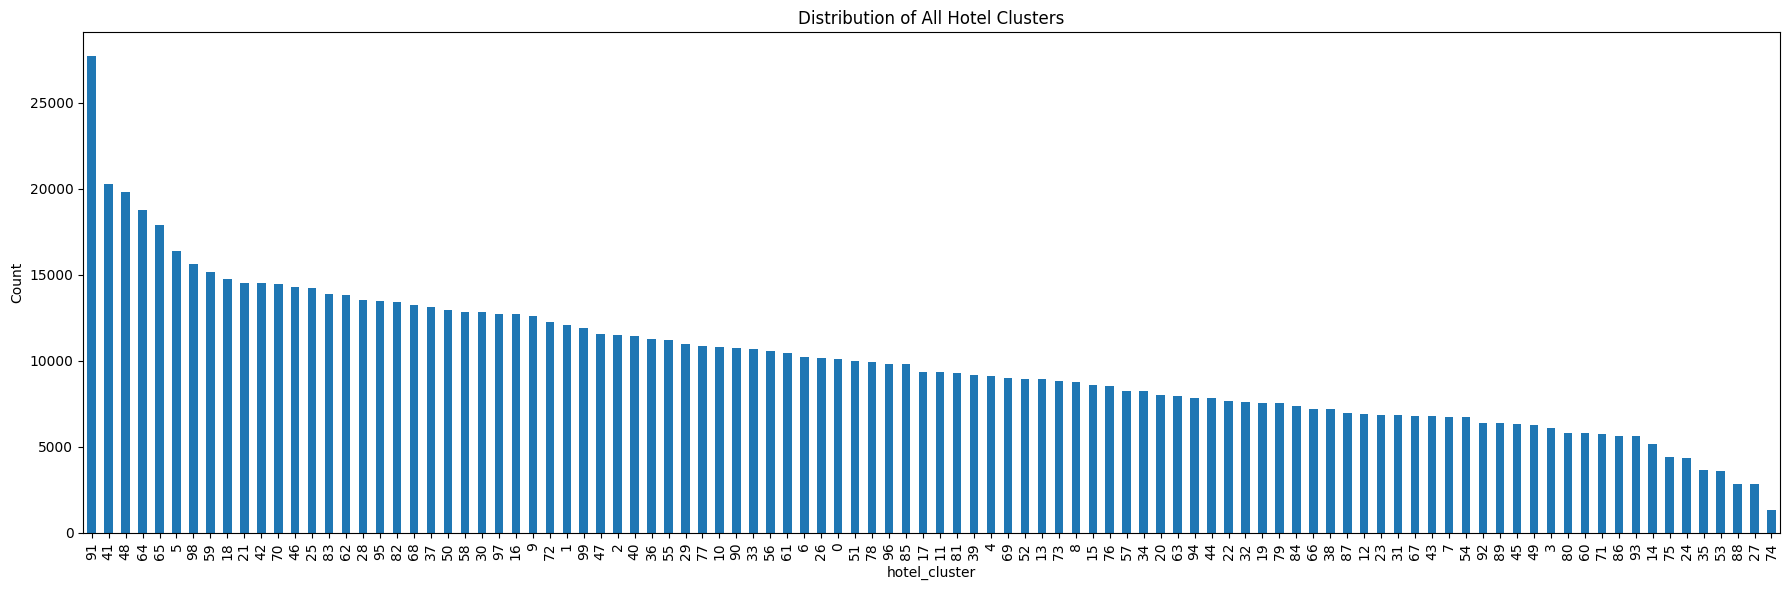

In [69]:
# distribution of hotel_cluster column
plt.figure(figsize=(18,6))
df['hotel_cluster'].value_counts().plot(kind='bar')
plt.title('Distribution of All Hotel Clusters')
plt.xlabel('hotel_cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


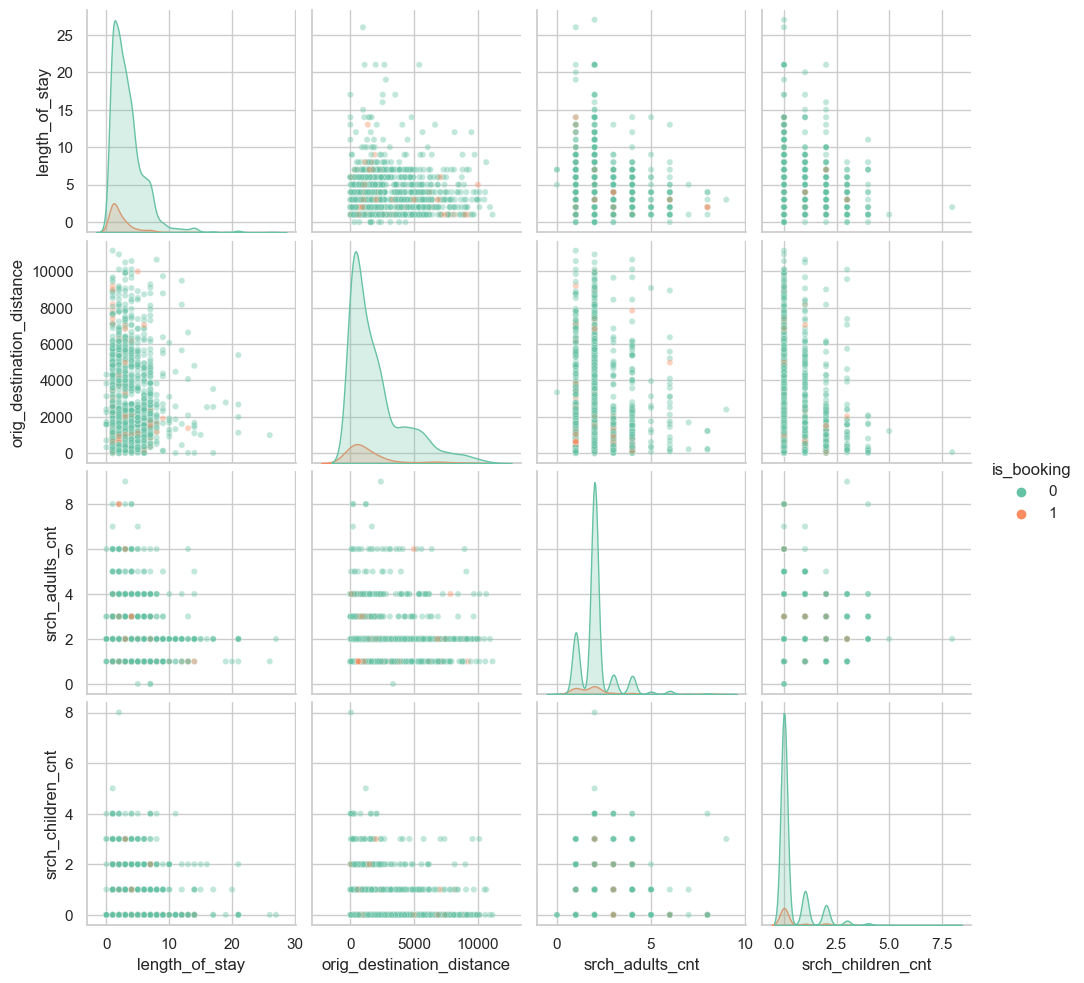

In [70]:
# set a nicer theme
sns.set_theme(style="whitegrid")

# sample for speed
pp = df[['length_of_stay','orig_destination_distance',
         'srch_adults_cnt','srch_children_cnt','is_booking']].sample(3000, random_state=42)

# pairplot
sns.pairplot(
    pp,
    vars=['length_of_stay','orig_destination_distance','srch_adults_cnt','srch_children_cnt'],
    hue='is_booking',
    diag_kind='kde',              # smoother histograms
    palette='Set2',               # pastel colors
    plot_kws={'alpha':0.4, 's':20}
)

##### Some Takeaways

1. **Length of stay**

   * Most trips are **short** (1–5 nights).
   * Very few cases go beyond 10 nights (those are rare).
   * Bookings (`is_booking = 1`, orange) follow the same trend — short stays dominate.

2. **Origin–destination distance**

   * Heavy concentration near **short distances**, but with a very long tail.
   * Bookings (orange) seem **slightly more frequent at shorter distances**. Clicks (green) spread more across long tails.
     → suggests people browse long-haul destinations but book more often closer to home.

3. **Adults count (`srch_adults_cnt`)**

   * Peaks at **2 adults** (typical couple travel).
   * Also a lot of **1 adult** (solo).
   * Bookings are most dense at **2 adults**.

4. **Children count (`srch_children_cnt`)**

   * Mostly **0**.
   * Some cases with 1 or 2, but rare.
   * Bookings happen mostly when no children in the search.

---

👉 In short:

* **Short stays, 1–2 adults, 0 kids, short distance → more likely to be actual bookings.**
* Long-haul / long stays → often just searches/clicks.

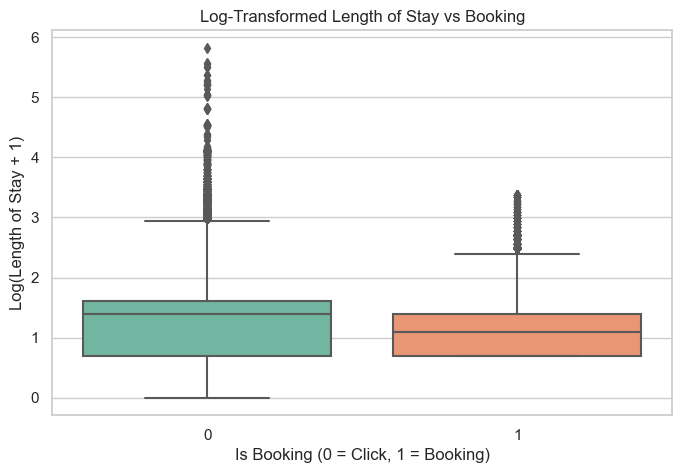

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_booking', 
            y=np.log1p(df['length_of_stay']), 
            data=df, 
            palette='Set2')
plt.title("Log-Transformed Length of Stay vs Booking")
plt.xlabel("Is Booking (0 = Click, 1 = Booking)")
plt.ylabel("Log(Length of Stay + 1)")
plt.show()

##### Takeaway
Shorter stays = more serious intent to book.

Longer stays = more “shopping around.”

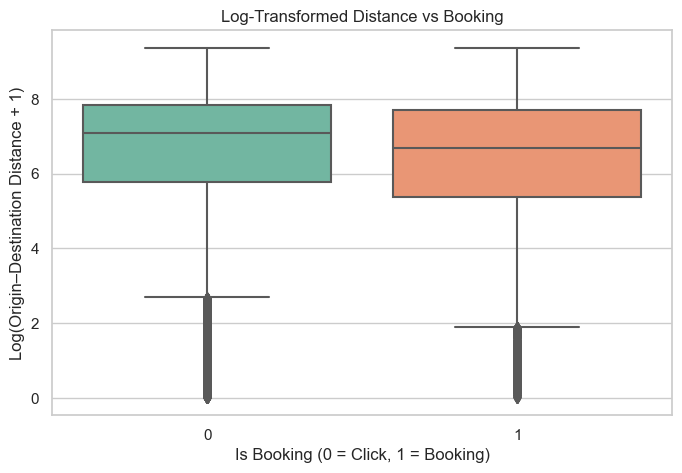

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='is_booking',
    y=np.log1p(df['orig_destination_distance']),
    data=df,
    palette='Set2'
)
plt.title("Log-Transformed Distance vs Booking")
plt.xlabel("Is Booking (0 = Click, 1 = Booking)")
plt.ylabel("Log(Origin–Destination Distance + 1)")
plt.show()

##### Takeaway
- Shorter trips → more bookings
- Longer trips → more clicks.

Raw counts:
 is_mobile  is_booking
0          0             793033
           1              71564
1          0             126217
           1               7886
dtype: int64

Booking % by device:
is_mobile
0    8.3
1    5.9
Name: is_booking, dtype: float64


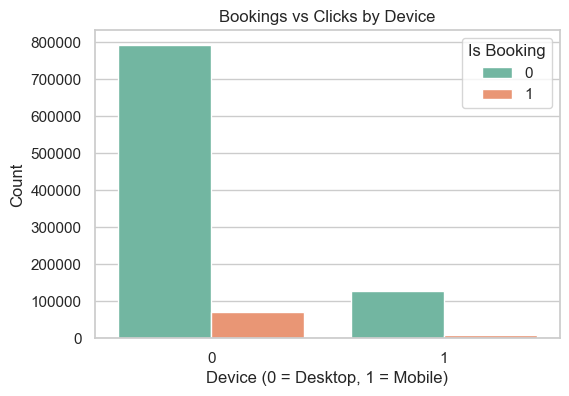

In [86]:
# raw counts
print("Raw counts:\n", df.groupby(['is_mobile','is_booking']).size())

# percentages (booking rate by device)
print("\nBooking % by device:")
print(df.groupby('is_mobile')['is_booking'].mean().round(3) * 100)

# plot
plt.figure(figsize=(6,4))
sns.countplot(x='is_mobile', hue='is_booking', data=df, palette='Set2')
plt.title("Bookings vs Clicks by Device")
plt.xlabel("Device (0 = Desktop, 1 = Mobile)")
plt.ylabel("Count")
plt.legend(title="Is Booking")
plt.show()

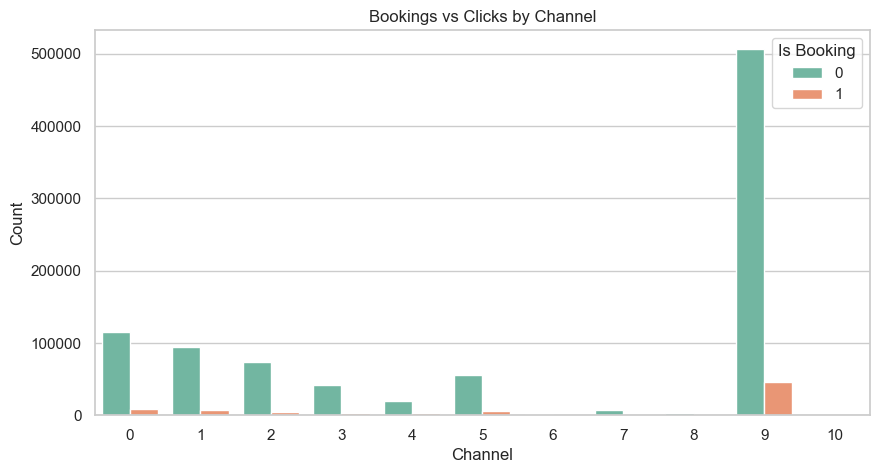

In [88]:
# channel vs booking
plt.figure(figsize=(10,5))
sns.countplot(x='channel', hue='is_booking', data=df, palette='Set2')
plt.title("Bookings vs Clicks by Channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.legend(title="Is Booking")
plt.show()


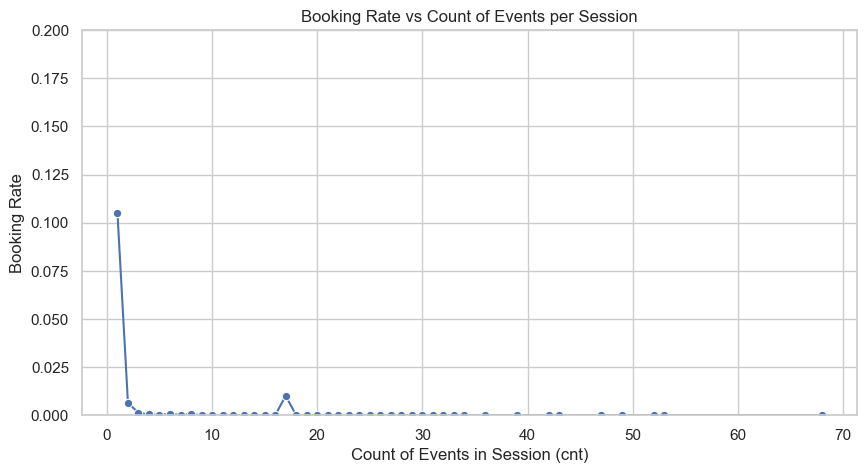

In [143]:
# Booking Rate vs Count of Events per Session (cnt)
# Calculate booking rate by cnt
cnt_booking_rate = df.groupby("cnt")["is_booking"].mean().reset_index()

# Plot booking rate vs cnt
plt.figure(figsize=(10,5))
sns.lineplot(data=cnt_booking_rate, x="cnt", y="is_booking", marker="o")
plt.title("Booking Rate vs Count of Events per Session")
plt.xlabel("Count of Events in Session (cnt)")
plt.ylabel("Booking Rate")
plt.ylim(0, 0.2)   # focus on 0–20% booking probability
plt.show()

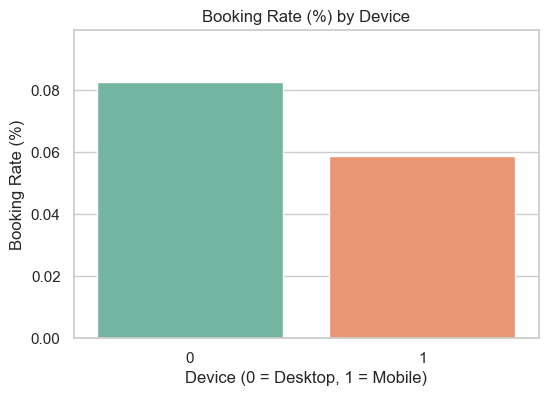

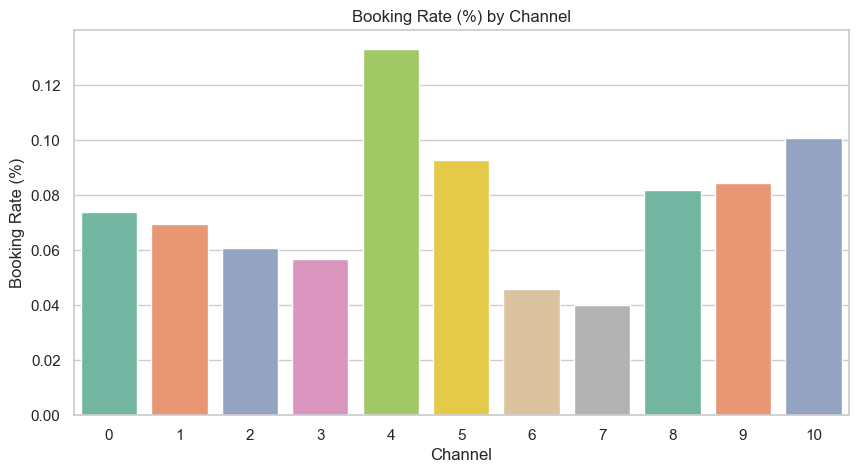

In [89]:
# Device booking %
device_rate = df.groupby('is_mobile')['is_booking'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='is_mobile', y='is_booking', data=device_rate, palette='Set2')
plt.title("Booking Rate (%) by Device")
plt.xlabel("Device (0 = Desktop, 1 = Mobile)")
plt.ylabel("Booking Rate (%)")
plt.ylim(0, device_rate['is_booking'].max()*1.2)
plt.show()


# Channel booking %
channel_rate = df.groupby('channel')['is_booking'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='channel', y='is_booking', data=channel_rate, palette='Set2')
plt.title("Booking Rate (%) by Channel")
plt.xlabel("Channel")
plt.ylabel("Booking Rate (%)")
plt.show()

Raw counts:
 is_package  is_booking
0           0             681262
            1              68744
1           0             237988
            1              10706
dtype: int64

Booking % by package option:
is_package
0    9.2
1    4.3
Name: is_booking, dtype: float64


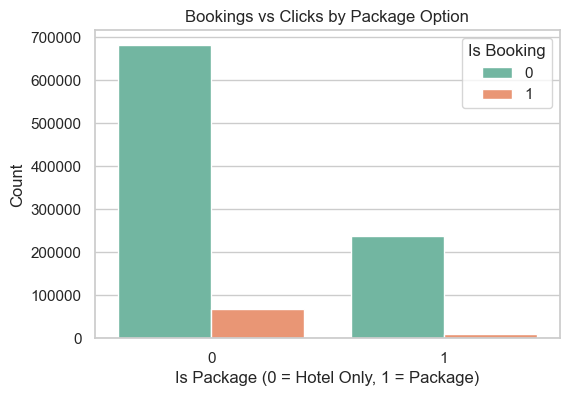

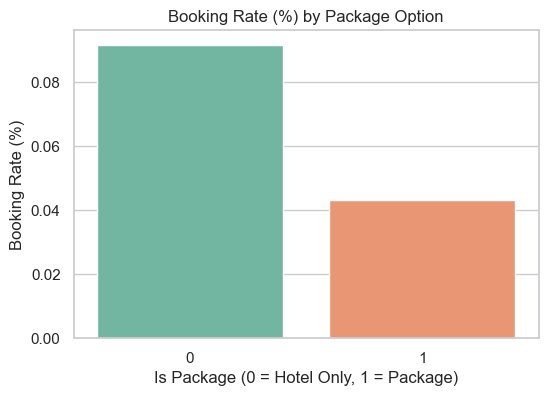

In [90]:
# Raw counts
print("Raw counts:\n", df.groupby(['is_package','is_booking']).size())

# Percentages (booking rate)
print("\nBooking % by package option:")
print(df.groupby('is_package')['is_booking'].mean().round(3) * 100)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='is_package', hue='is_booking', data=df, palette='Set2')
plt.title("Bookings vs Clicks by Package Option")
plt.xlabel("Is Package (0 = Hotel Only, 1 = Package)")
plt.ylabel("Count")
plt.legend(title="Is Booking")
plt.show()

# Plot booking rate only
package_rate = df.groupby('is_package')['is_booking'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='is_package', y='is_booking', data=package_rate, palette='Set2')
plt.title("Booking Rate (%) by Package Option")
plt.xlabel("Is Package (0 = Hotel Only, 1 = Package)")
plt.ylabel("Booking Rate (%)")
plt.show()


Raw counts:
 hotel_continent  is_booking
0                0              17271
                 1               1432
1                0                  6
2                0             475587
                 1              48319
3                0             121550
                 1               8261
4                0             109796
                 1               5296
5                0               9329
                 1                704
6                0             185711
                 1              15438
dtype: int64

Booking % by continent:
hotel_continent
0    7.7
1    0.0
2    9.2
3    6.4
4    4.6
5    7.0
6    7.7
Name: is_booking, dtype: float64


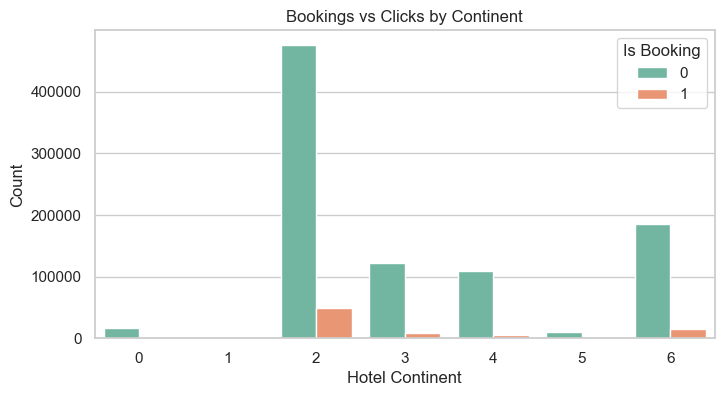

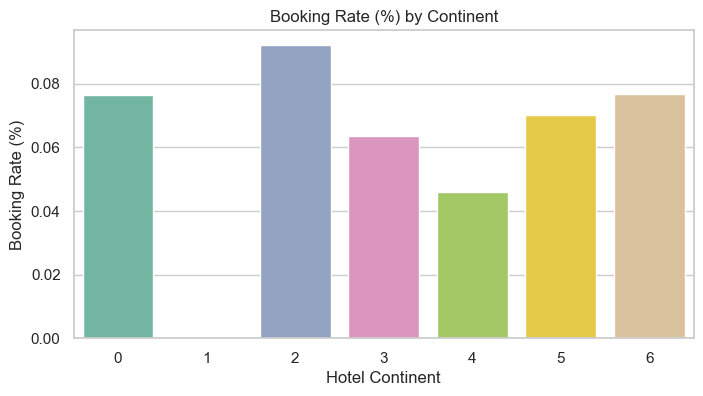

In [91]:
# 🌍 Hotel Continent vs Booking
# raw counts
print("Raw counts:\n", df.groupby(['hotel_continent','is_booking']).size())

# booking %
print("\nBooking % by continent:")
print(df.groupby('hotel_continent')['is_booking'].mean().round(3) * 100)

# plot
plt.figure(figsize=(8,4))
sns.countplot(x='hotel_continent', hue='is_booking', data=df, palette='Set2')
plt.title("Bookings vs Clicks by Continent")
plt.xlabel("Hotel Continent")
plt.ylabel("Count")
plt.legend(title="Is Booking")
plt.show()

# booking rate barplot
continent_rate = df.groupby('hotel_continent')['is_booking'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='hotel_continent', y='is_booking', data=continent_rate, palette='Set2')
plt.title("Booking Rate (%) by Continent")
plt.xlabel("Hotel Continent")
plt.ylabel("Booking Rate (%)")
plt.show()



Booking % by top 15 hotel countries:
hotel_country
8       4.2
48      5.6
50      9.0
63      7.9
70      8.8
77      6.5
99      9.5
105     7.0
106     7.3
144     9.6
163     2.9
171     7.5
182     4.8
198    11.3
204     6.5
Name: is_booking, dtype: float64


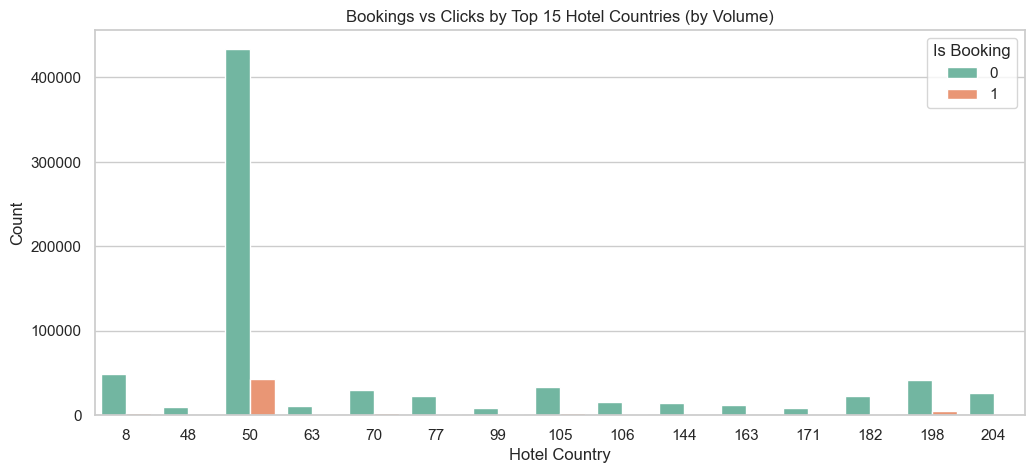

In [94]:
# 🏳️ Hotel Country vs Booking (top 15 by volume)
top_countries = df['hotel_country'].value_counts().head(15).index
df_country = df[df['hotel_country'].isin(top_countries)]

# booking rate table
print("\nBooking % by top 15 hotel countries:")
print(df_country.groupby('hotel_country')['is_booking'].mean().round(3) * 100)

# plot
plt.figure(figsize=(12,5))
sns.countplot(x='hotel_country', hue='is_booking', data=df_country, palette='Set2')
plt.title("Bookings vs Clicks by Top 15 Hotel Countries (by Volume)")
plt.xlabel("Hotel Country")
plt.ylabel("Count")
plt.legend(title="Is Booking")
plt.show()


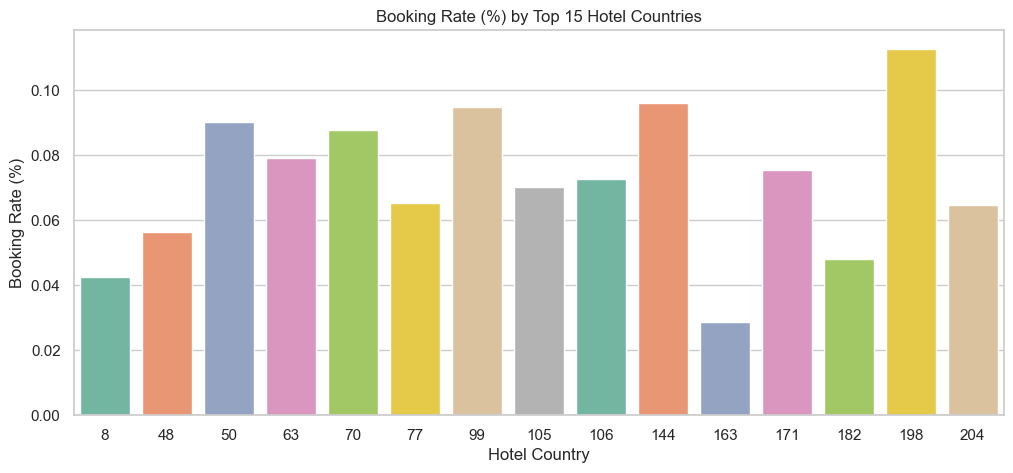

In [97]:
# booking rate barplot for top 15 countries
top_countries = df['hotel_country'].value_counts().head(15).index
df_country = df[df['hotel_country'].isin(top_countries)]

country_rate = (
    df_country.groupby('hotel_country')['is_booking']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,5))
sns.barplot(x='hotel_country', y='is_booking', data=country_rate, palette='Set2')
plt.title("Booking Rate (%) by Top 15 Hotel Countries")
plt.xlabel("Hotel Country")
plt.ylabel("Booking Rate (%)")
plt.show()



Booking % by top 15 hotel markets:
hotel_market
19       7.3
27       5.0
29       6.2
46       5.8
110      3.2
126      2.8
212      4.2
365      9.0
368      6.7
628      7.2
637     10.1
675      6.0
682      5.0
701      6.0
1230     8.9
Name: is_booking, dtype: float64


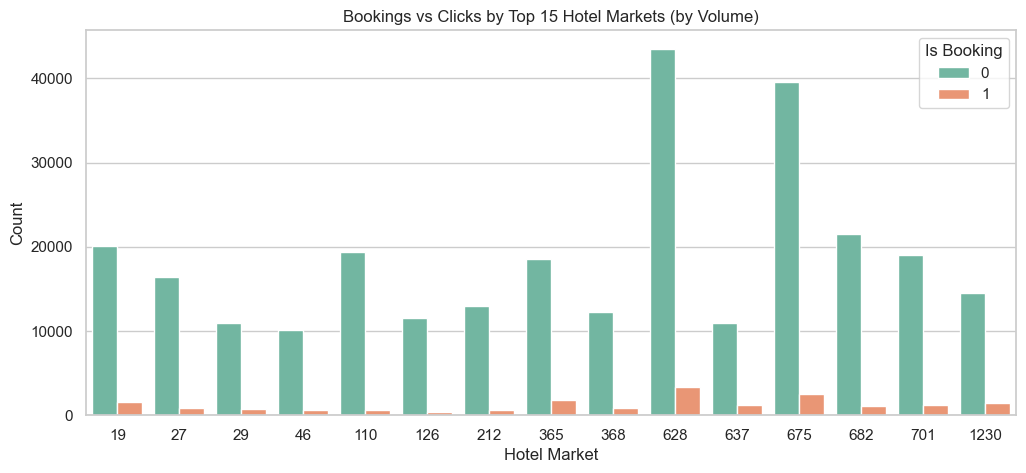

In [95]:
# Hotel Market vs Booking (top 15 by volume)
top_markets = df['hotel_market'].value_counts().head(15).index
df_market = df[df['hotel_market'].isin(top_markets)]

# booking rate table
print("\nBooking % by top 15 hotel markets:")
print(df_market.groupby('hotel_market')['is_booking'].mean().round(3) * 100)

# plot
plt.figure(figsize=(12,5))
sns.countplot(x='hotel_market', hue='is_booking', data=df_market, palette='Set2')
plt.title("Bookings vs Clicks by Top 15 Hotel Markets (by Volume)")
plt.xlabel("Hotel Market")
plt.ylabel("Count")
plt.legend(title="Is Booking")
plt.show()


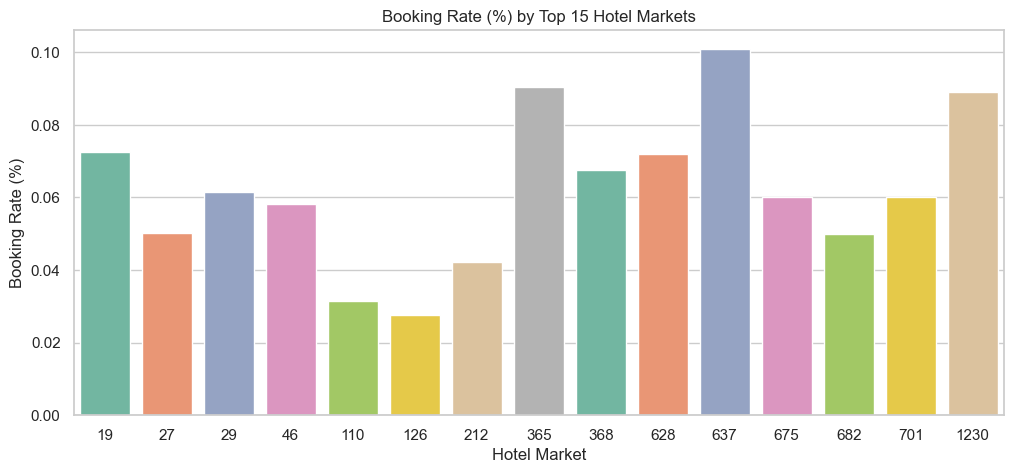

In [99]:
# booking rate barplot for top 15 markets
top_markets = df['hotel_market'].value_counts().head(15).index
df_market = df[df['hotel_market'].isin(top_markets)]

market_rate = (
    df_market.groupby('hotel_market')['is_booking']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,5))
sns.barplot(x='hotel_market', y='is_booking', data=market_rate, palette='Set2')
plt.title("Booking Rate (%) by Top 15 Hotel Markets")
plt.xlabel("Hotel Market")
plt.ylabel("Booking Rate (%)")
plt.show()


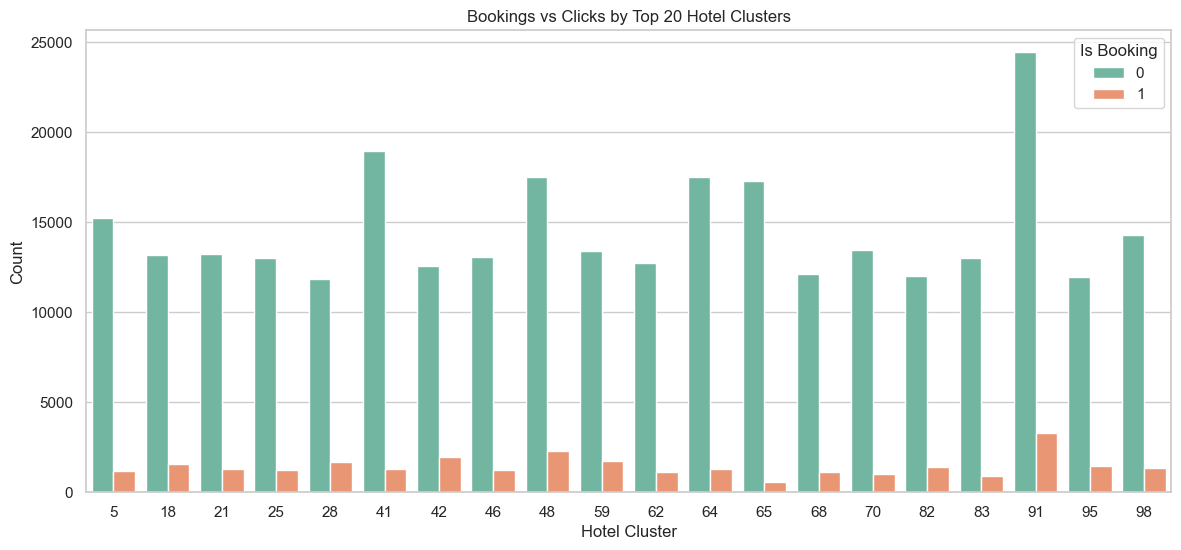

In [102]:
# Hotel Cluster vs Booking (top 20 by volume)
top_clusters = df['hotel_cluster'].value_counts().head(20).index
df_clusters = df[df['hotel_cluster'].isin(top_clusters)]

plt.figure(figsize=(14,6))
sns.countplot(x='hotel_cluster', hue='is_booking', data=df_clusters, palette='Set2')
plt.title("Bookings vs Clicks by Top 20 Hotel Clusters")
plt.xlabel("Hotel Cluster")
plt.ylabel("Count")
plt.legend(title="Is Booking")
plt.show()


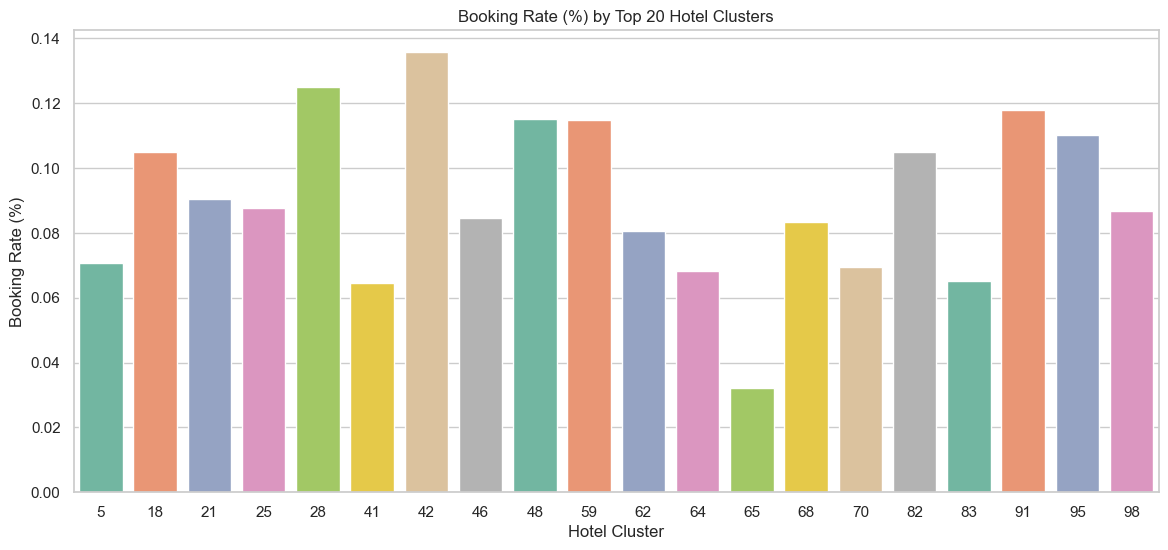

In [103]:
cluster_rate = (
    df_clusters.groupby('hotel_cluster')['is_booking']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14,6))
sns.barplot(x='hotel_cluster', y='is_booking', data=cluster_rate, palette='Set2')
plt.title("Booking Rate (%) by Top 20 Hotel Clusters")
plt.xlabel("Hotel Cluster")
plt.ylabel("Booking Rate (%)")
plt.show()


### Observations and Insights

---

### 📊 Raw Counts

* Clusters like **91, 41, 48, 64, 65** dominate in terms of traffic.
* But in all clusters, **clicks (green)** far exceed **bookings (orange)** → expected, since most user activity is browsing.

---

### 📈 Booking Rate (%)

* **High conversion clusters**: 42 (\~13.5%), 28 (\~12.5%), 91 (\~11.5%), 59 (\~11.5%), 95 (\~11%).
* **Low conversion clusters**: 65 (\~3%), 41 (\~6.5%), 83 (\~6.5%).
* Interesting: cluster **41** is very high-volume but relatively poor in conversion → a lot of browsing, fewer bookings.
* Meanwhile, cluster **42** is smaller in volume but has the **highest conversion rate**.

---

👉 Insights:

* Some clusters are “**high-volume low-conversion**” → lots of browsing (e.g., 41, 65).
* Others are “**low-volume high-conversion**” → fewer searches, but very serious booking intent (e.g., 42, 28).
* This imbalance is crucial for prediction: a naive model might just predict “cluster 91” a lot because it’s common, but **conversion-focused models need to pay attention to high-rate clusters too**.

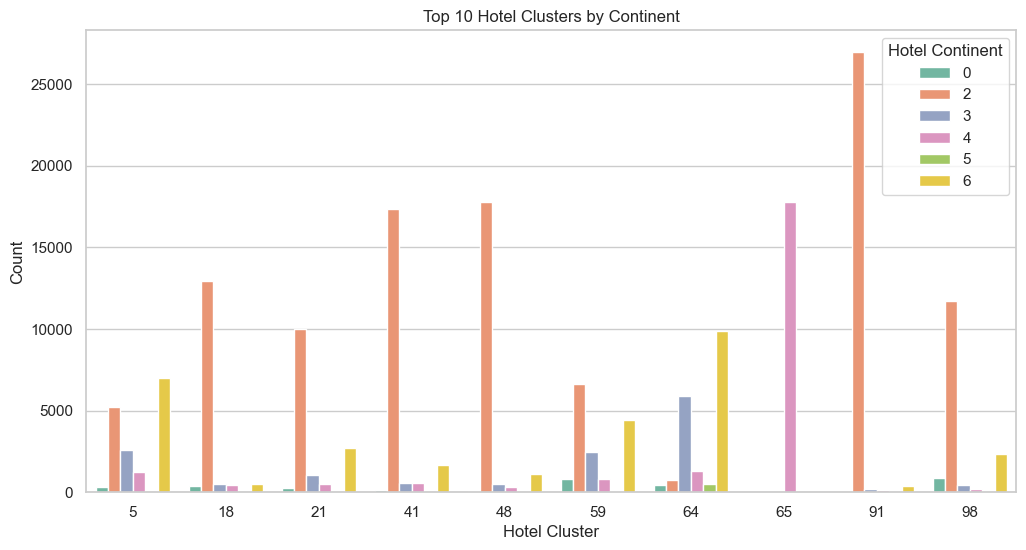

In [108]:
# Hotel Cluster vs Continent (top 10 clusters by volume)
top_clusters = df['hotel_cluster'].value_counts().head(10).index
df_top = df[df['hotel_cluster'].isin(top_clusters)]

plt.figure(figsize=(12,6))
sns.countplot(x='hotel_cluster', hue='hotel_continent', data=df_top, palette='Set2')
plt.title("Top 10 Hotel Clusters by Continent")
plt.xlabel("Hotel Cluster")
plt.ylabel("Count")
plt.legend(title="Hotel Continent")
plt.show()


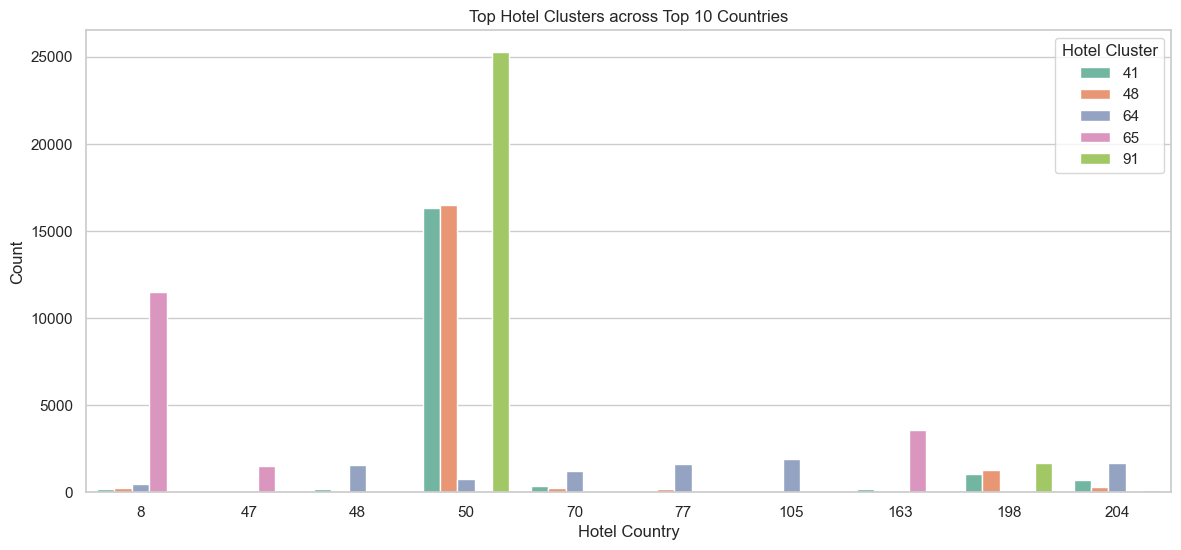

In [ ]:
# Hotel Cluster vs Countries (top 5 clusters by volume)
top_clusters = df['hotel_cluster'].value_counts().head(5).index
df_top = df[df['hotel_cluster'].isin(top_clusters)]

plt.figure(figsize=(14,6))
sns.countplot(x='hotel_country', hue='hotel_cluster', 
              data=df_top[df_top['hotel_country'].isin(df_top['hotel_country'].value_counts().head(10).index)],
              palette='Set2')
plt.title("Top Hotel Clusters across Top 10 Countries")
plt.xlabel("Hotel Country")
plt.ylabel("Count")
plt.legend(title="Hotel Cluster")
plt.show()


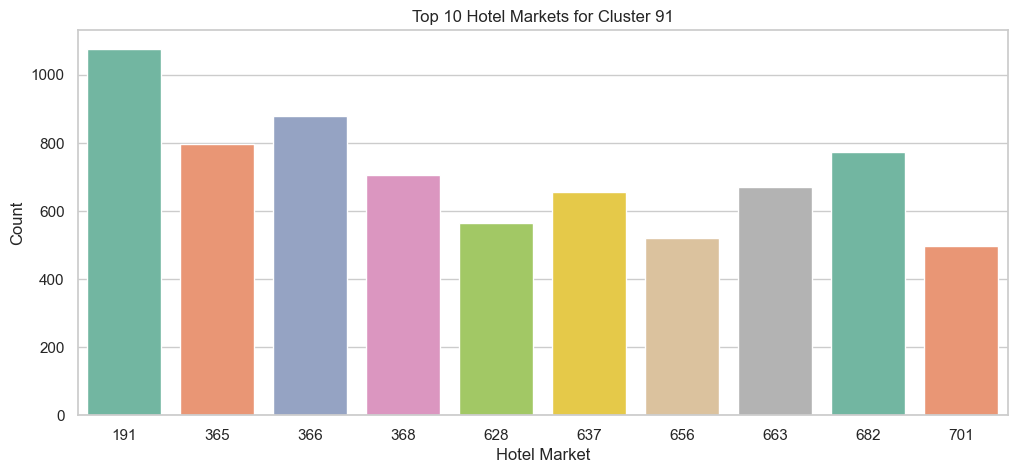

In [111]:
# For a specific cluster (e.g., 91), which hotel_markets are most common?
cluster_focus = df[df['hotel_cluster'] == 91]

top_markets = cluster_focus['hotel_market'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_markets.index, y=top_markets.values, palette='Set2')
plt.title("Top 10 Hotel Markets for Cluster 91")
plt.xlabel("Hotel Market")
plt.ylabel("Count")
plt.show()

#### Observations and Insights

---

### 🌍 Clusters × Continent

* Many top clusters (41, 48, 91) are **heavily concentrated in Continent 2** → suggesting it’s a major source of bookings.
* Cluster 65 is dominated by **Continent 4**, while cluster 64 has stronger presence in **Continent 3**.
  👉 Some clusters are **global** (spread across multiple continents), while others are very **region-specific**.

---

### 🏳️ Clusters × Country

* Clusters 41 & 48 are concentrated in **Country 50** → likely a very popular travel destination.
* Cluster 65 is strongly linked to **Country 8** (maybe a specific resort region).
* Cluster 91 dominates **Country 50** as well → so cluster 91 & 48 may compete within the same country.
  👉 Countries act almost like **anchors** for clusters: many clusters are “specialists” in one or two countries.

---

### 🏨 Cluster 91 × Markets

* Cluster 91 spreads across multiple **markets** within Country 50.
* Markets like **191, 366, 365** are its strongest.
  👉 This suggests hotel markets capture **finer granularity** (cities or regions), and cluster 91 is widespread across them.

---

💡 **EDA insight for modeling**:

* `hotel_cluster` is **not random** — it’s strongly tied to geography (continent, country, market).
* Features like `hotel_country` and `hotel_market` will be **powerful predictors** for the target.
* In fact, a baseline model that always predicts the **most common cluster per market** would already perform decently.

##### **Break from Clusters**

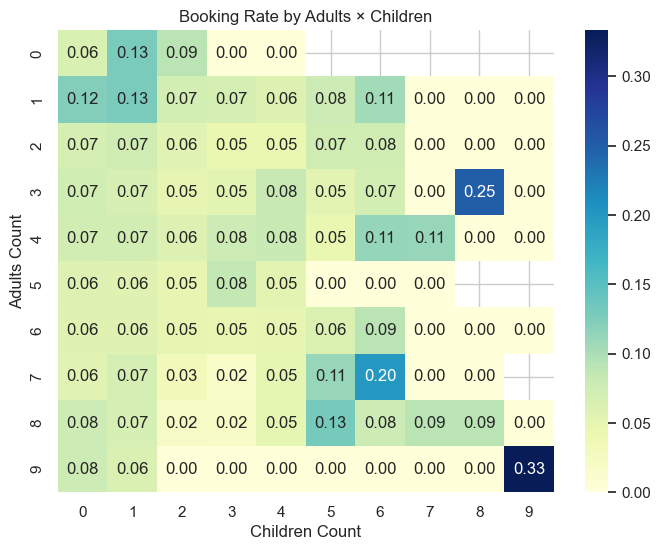

In [125]:
# Pivot table: booking rate by adults × children
pivot = df.pivot_table(
    index='srch_adults_cnt',
    columns='srch_children_cnt',
    values='is_booking',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Booking Rate by Adults × Children")
plt.xlabel("Children Count")
plt.ylabel("Adults Count")
plt.show()

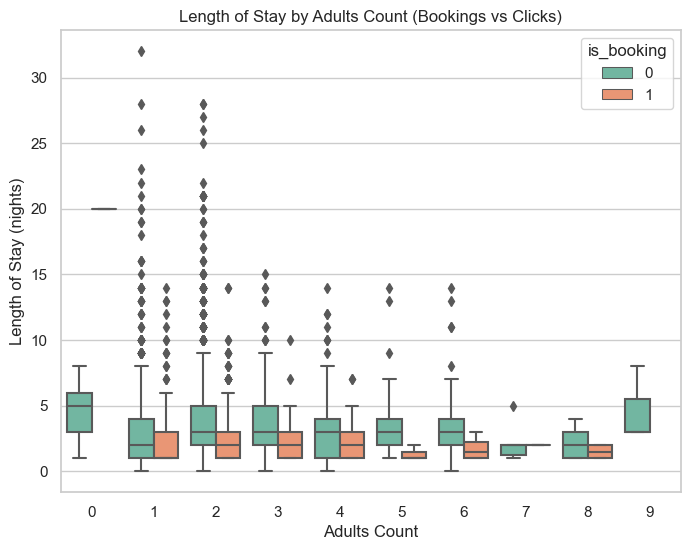

In [126]:
plt.figure(figsize=(8,6))
sns.boxplot(x='srch_adults_cnt', y='length_of_stay',
            hue='is_booking', data=df.sample(10000, random_state=42),
            palette='Set2')
plt.title("Length of Stay by Adults Count (Bookings vs Clicks)")
plt.xlabel("Adults Count")
plt.ylabel("Length of Stay (nights)")
plt.show()


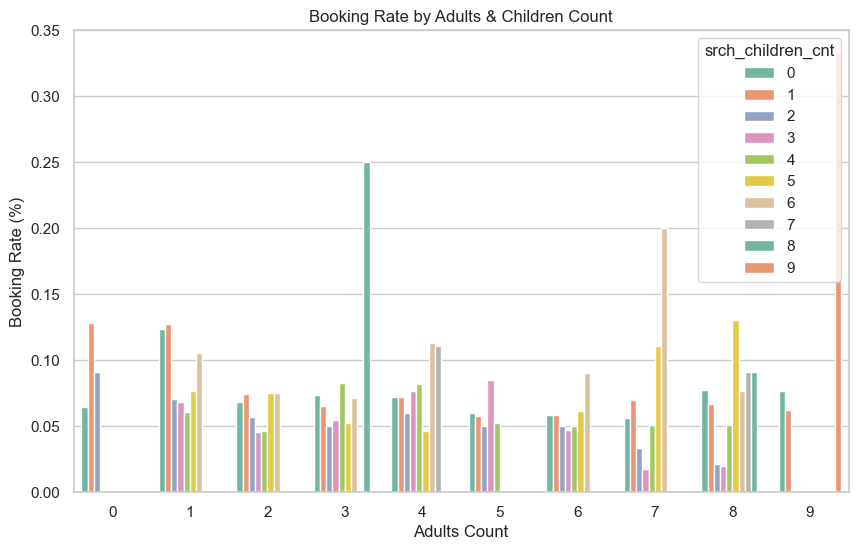

In [127]:
adults_children = df.groupby(['srch_adults_cnt','srch_children_cnt'])['is_booking'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='srch_adults_cnt', y='is_booking',
            hue='srch_children_cnt', data=adults_children, palette='Set2')
plt.title("Booking Rate by Adults & Children Count")
plt.xlabel("Adults Count")
plt.ylabel("Booking Rate (%)")
plt.show()


#### **Back to Clusters**

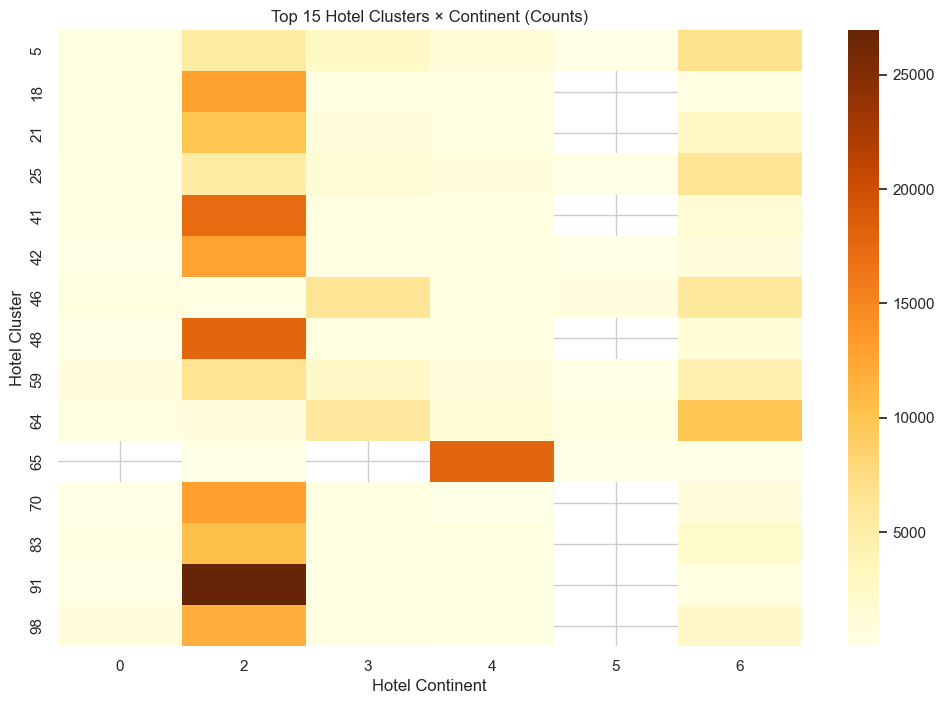

In [133]:
# Hotel Cluster vs Continent (top 15 clusters by volume)
top_clusters = df['hotel_cluster'].value_counts().head(15).index
df_top = df[df['hotel_cluster'].isin(top_clusters)]

pivot = df_top.pivot_table(
    index="hotel_cluster",
    columns="hotel_continent",
    values="is_booking",
    aggfunc="count"
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="YlOrBr", annot=False, cbar=True)
plt.title("Top 15 Hotel Clusters × Continent (Counts)")
plt.xlabel("Hotel Continent")
plt.ylabel("Hotel Cluster")
plt.show()


### 🔹 What Continent vs Hotel Cluster tells me

1. **Cluster 91 is dominant in one geography** → it may correspond to a highly popular market (e.g., U.S. domestic or Western Europe).
2. **Cluster 65 is distinct** → concentrated in continent 4, could be an emerging or niche market (e.g., Asia or Africa).
3. **Clusters split by geography** → we can’t treat hotel clusters as “global” categories; they’re clearly tied to geography.
4. **Continent 2 is the hub** → the majority of top clusters are strongest here, making it the “core” market.


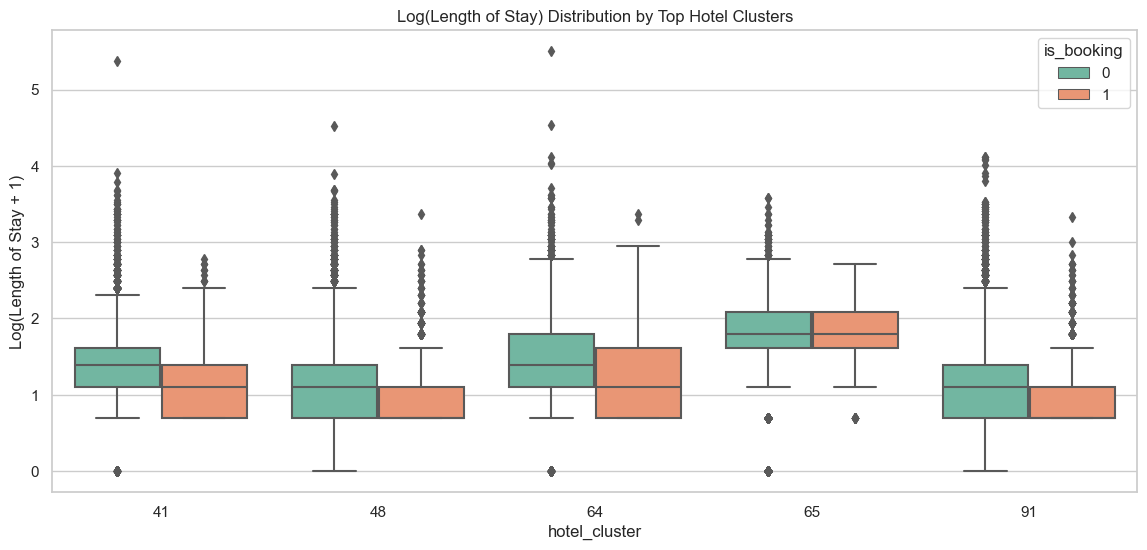

In [138]:
# Hotel Cluster vs Length of Stay (log) (top 15 clusters by volume)
df_top = df[df['hotel_cluster'].isin(top_clusters)].copy()
df_top['log_stay'] = np.log1p(df_top['length_of_stay'])  # log(1+x)

plt.figure(figsize=(14,6))
sns.boxplot(
    x="hotel_cluster", y="log_stay",
    hue="is_booking", data=df_top,
    palette="Set2"
)
plt.title("Log(Length of Stay) Distribution by Top Hotel Clusters")
plt.ylabel("Log(Length of Stay + 1)")
plt.show()


### 🔹 What length of stay vs hotel cluster tells me

1. **Different trip types by cluster**

   * **65, 64 → long-stay clusters** (maybe leisure destinations, resorts).
   * **91, 41, 48 → short-stay clusters** (likely urban/business or weekend trips).

2. **Clicks vs Bookings behavior**

   * Clicks often have fatter tails (people browsing long stays).
   * Actual bookings are concentrated on shorter, realistic stays.

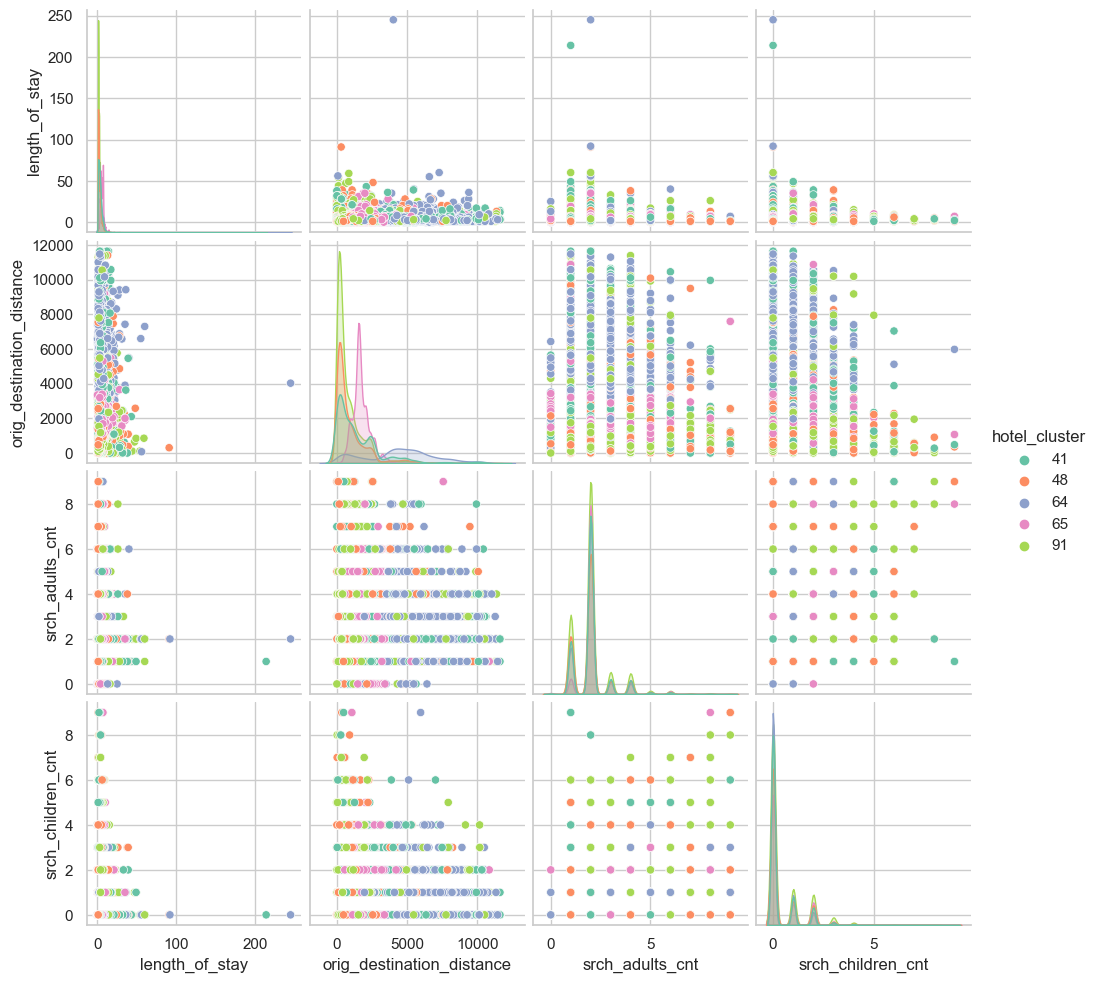

In [137]:
# Pairplot of top 5 clusters
top_clusters = df['hotel_cluster'].value_counts().head(5).index
df_top = df[df['hotel_cluster'].isin(top_clusters)]

sns.pairplot(
    df_top[['length_of_stay','orig_destination_distance',
            'srch_adults_cnt','srch_children_cnt','hotel_cluster']],
    hue="hotel_cluster", palette="Set2", diag_kind="kde"
)
plt.show()


### 🔹 What I see in the pairplot

1. **Length of stay vs distance**

   * Most trips are **short stays + short distances**, but…
   * **Cluster 65 and 64** show more spread toward **longer distances + longer stays** (classic holiday clusters).
   * **Cluster 91** sticks closer to **short distance + short stay** → city/business profile.

2. **Adults vs Children**

   * The majority are **2 adults, 0 kids** across all clusters → default travel unit.
   * Clusters don’t show strong separation here, but **Cluster 65** seems to capture more families (slight spread with children counts).

3. **Adults vs Rooms** (indirect via srch\_adults\_cnt + srch\_children\_cnt)

   * Consistency holds: most bookings are small parties.
   * Large groups are rare and cluster assignment looks noisy (outliers sprinkled across).

4. **Cluster color separation**

   * No perfect cluster boundaries (overlap is expected).
   * But **distribution densities differ**:

     * Cluster 91: tightly packed around short trips.
     * Cluster 65: fatter tails on stay & distance.
     * Cluster 64: somewhere in between.

---

### 🔹 What I can infer

* **Clusters reflect trip archetypes**:

  * **Cluster 91 → urban, short-trip, close distance**.
  * **Cluster 65 (and partly 64) → holiday, long-haul, long-stay**.
  * **Cluster 41/48 → mid-range behavior, still short trips but not as compact as 91**.
* **Families are a minority, but they’re more visible in certain clusters (esp. 65).**

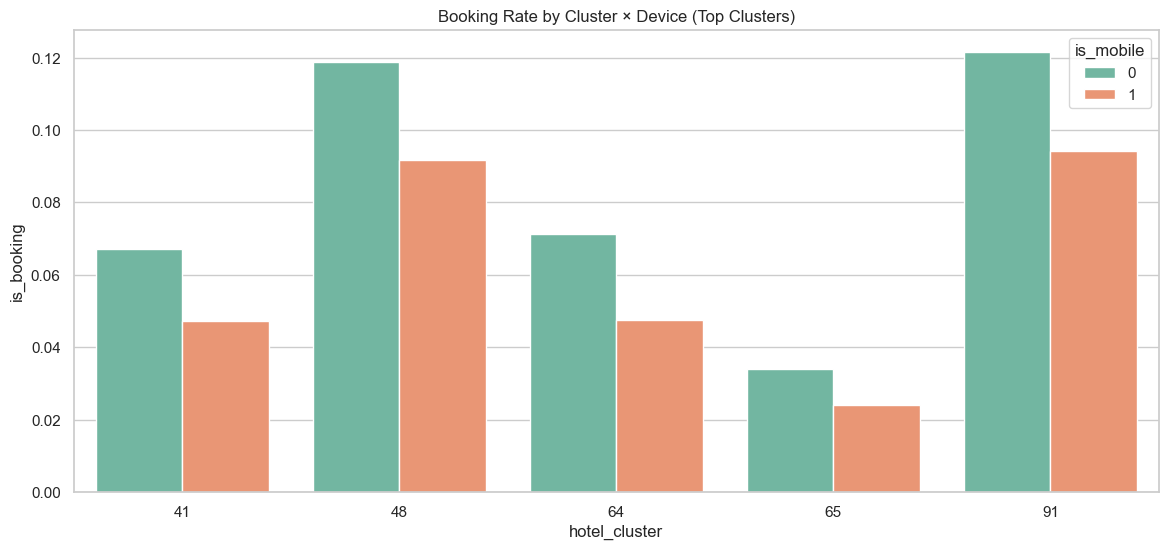

In [139]:
# Hotel Cluster vs Device (top 15 clusters by volume)
cluster_device = df.groupby(["hotel_cluster","is_mobile"])["is_booking"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(
    x="hotel_cluster", y="is_booking", hue="is_mobile",
    data=cluster_device[cluster_device["hotel_cluster"].isin(top_clusters)],
    palette="Set2"
)
plt.title("Booking Rate by Cluster × Device (Top Clusters)")
plt.show()


### 🔹 What Hotel Cluster vs device type tells me

1. **Desktop is stronger for bookings** — across all clusters, users are more likely to finalize on desktop.
2. **Cluster-specific device behavior**

   * Clusters **91 & 48** → strong performers regardless of device, though still higher on desktop.
   * **Cluster 65** → very low conversion overall, even worse on mobile. Suggests this cluster attracts browsing but not commitment (maybe long, expensive trips).
3. **Strategic implication**

   * Predictive modeling could potentially use **device + cluster** interaction as a powerful feature.
   * Example: A mobile visitor in cluster 65 is much less likely to book than a desktop visitor in cluster 91.

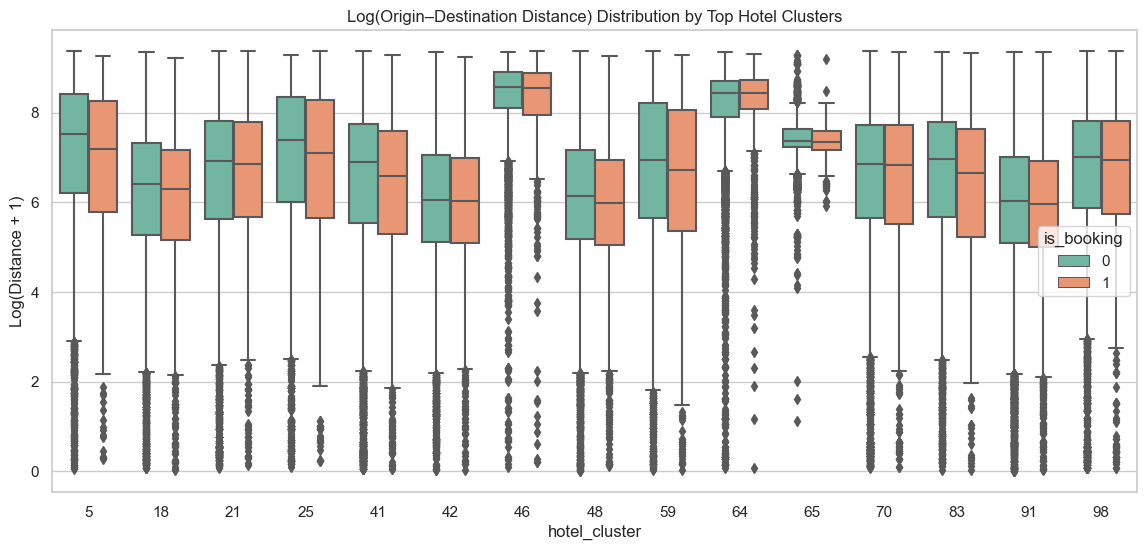

In [141]:
# Hotel Cluster vs Log(Distance) (top 15 clusters by volume)
top_clusters = df['hotel_cluster'].value_counts().head(15).index
df_top = df[df['hotel_cluster'].isin(top_clusters)].copy()

# log-transform distance
df_top['log_distance'] = np.log1p(df_top['orig_destination_distance'])

plt.figure(figsize=(14,6))
sns.boxplot(
    x="hotel_cluster", y="log_distance",
    hue="is_booking", data=df_top,
    palette="Set2"
)
plt.title("Log(Origin–Destination Distance) Distribution by Top Hotel Clusters")
plt.ylabel("Log(Distance + 1)")
plt.show()


### 🔹 What Distance vs hotel cluster tells me

1. **Clusters split by distance**

   * **65 & 64** → long-haul clusters.
   * **91, 41, 48** → short/medium-haul clusters.

2. **Clicks vs bookings gap**

   * Users are more aspirational in clicks (exotic, long-haul).
   * Bookings skew toward nearby destinations.

3. **Trip type consistency**

   * Together with stay length (Plot #2), cluster **65 is clearly “long-haul + long-stay”**.
   * Cluster **91 is “short-haul + short-stay”**.

---

✅ Typical **cluster-level archetypes**:

* **Cluster 91** → urban, short-haul, short-stay, high booking rate.
* **Cluster 65** → holiday/leisure, long-haul, long-stay, low booking rate.
* **Cluster 64** → hybrid, some long-haul + moderate stays.
* **Clusters 41 & 48** → mid-range, moderately strong performers.